In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import utils

from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import root_mean_squared_error


In [ ]:
print(utils.get_version())

In [3]:
pdf_ytd2023_01: pd.DataFrame = utils.read_data('./data/yellow_tripdata_2023-01.parquet')


# Q1. Downloading the data

In [ ]:
print(f"Number of columns: {pdf_ytd2023_01.shape[1]}")
print("Columns:")
for col in pdf_ytd2023_01.columns:
    print(f"- {col}")

# Q2. Computing duration

In [5]:
pdf_ytd2023_01_duration = utils.add_duration(pdf_ytd2023_01)

In [ ]:
print(f"Duration std: {pdf_ytd2023_01.duration.std()}")

# Q3. Dropping outliers

<Axes: xlabel='duration', ylabel='Density'>

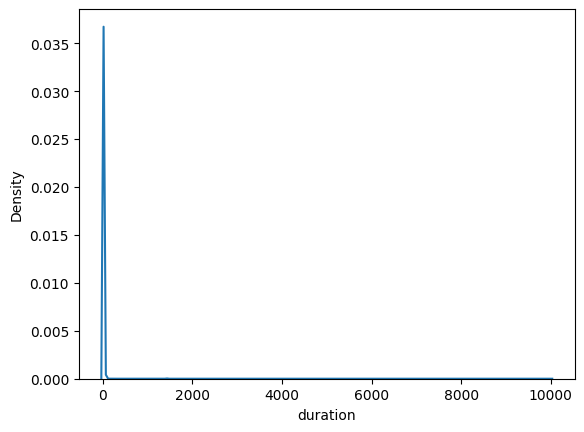

In [7]:
sns.kdeplot(pdf_ytd2023_01.duration, label='Duration')

In [8]:
fraction_records = int(((pdf_ytd2023_01_duration.duration >=1) & (pdf_ytd2023_01_duration.duration <= 60)).mean() * 100)
print(f"Fraction of records: {fraction_records}%")

Fraction of records: 98%


In [9]:
pdf_ytd2023_01_duration = pdf_ytd2023_01_duration[((pdf_ytd2023_01_duration.duration >=1) & (pdf_ytd2023_01_duration.duration <= 60))]

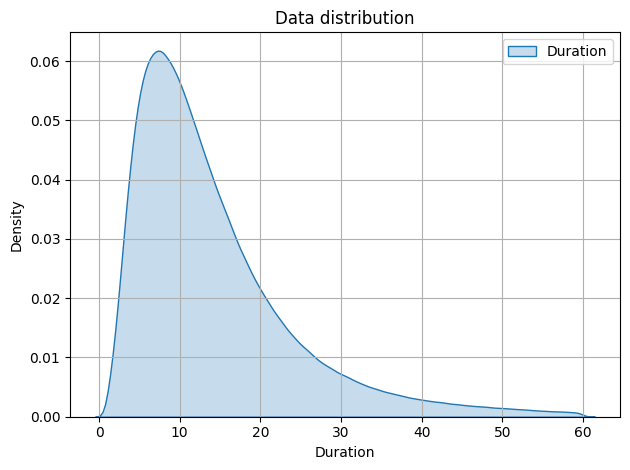

In [10]:
sns.kdeplot(pdf_ytd2023_01_duration.duration, label='Duration', fill=True)
plt.legend()
plt.title("Data distribution")
plt.xlabel("Duration")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()

# Q4. One-hot encoding


In [11]:
vect_data = utils.vectorize_data(pdf_ytd2023_01_duration)
x_train: pd.DataFrame = vect_data[0][0]
y_train: pd.DataFrame = vect_data[0][1]
dv: DictVectorizer = vect_data[1]

print(f"Number of columns in DictVectorizer: {x_train.shape[1]}")


Creating new DictVectorizer
Number of columns in DictVectorizer: 515


# Q5. Training a model


In [12]:
model, rmse = utils.train_model(x_train, y_train)
print(f"The root mean squared error is {rmse}")

The root mean squared error is 7.649261957977324


# Q6. Evaluating the model

In [14]:
pdf_ytd2023_02 = utils.read_data('./data/yellow_tripdata_2023-02.parquet')
pdf_ytd2023_02_duration = utils.add_duration(pdf_ytd2023_02)
vect_data = utils.vectorize_data(pdf_ytd2023_02_duration, dv=dv)
x_train: pd.DataFrame = vect_data[0][0]
y_train: pd.DataFrame = vect_data[0][1]

Using existing DictVectorizer


In [15]:
y_predict = model.predict(x_train)

rmse = root_mean_squared_error(y_train, y_predict)
print(f"The root mean squared error is {rmse}")

The root mean squared error is 42.28477551387839
